# IRIS FLOWER CLASSIFICATION

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Exploratory data analysis

In [2]:
# Load the dataset
iris_data = pd.read_csv('IRIS.csv')  # Make sure this path points to the CSV file location

# Inspect the first few rows of the data
print(iris_data.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check for any missing values
print("\nMissing values in each column:\n", iris_data.isnull().sum())


Missing values in each column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## Data preprocessing

In [7]:
# Encode the species column (target variable) into numerical values
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

In [8]:
# Split data into features (X) and target (y)
X = iris_data.drop(columns='species')
y = iris_data['species']

## Corelation matrix

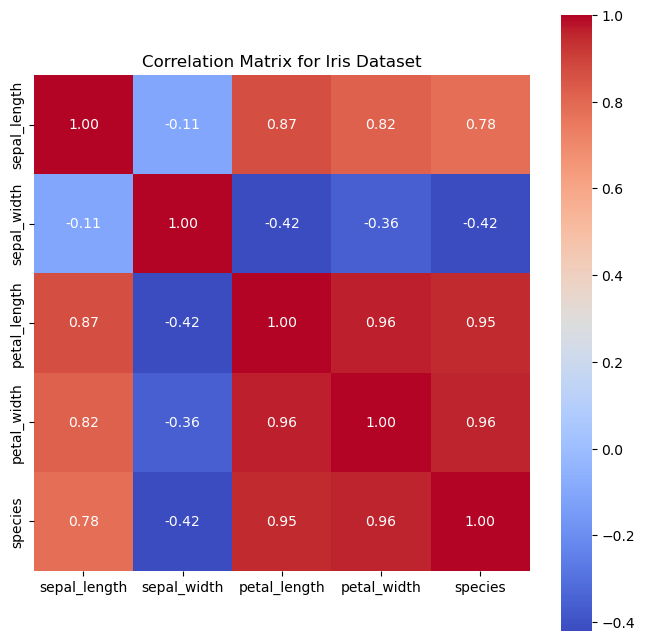

In [9]:
# Compute the correlation matrix
correlation_matrix = iris_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix for Iris Dataset")
plt.show()

## Data visulaization

C:\Users\2018ee122\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


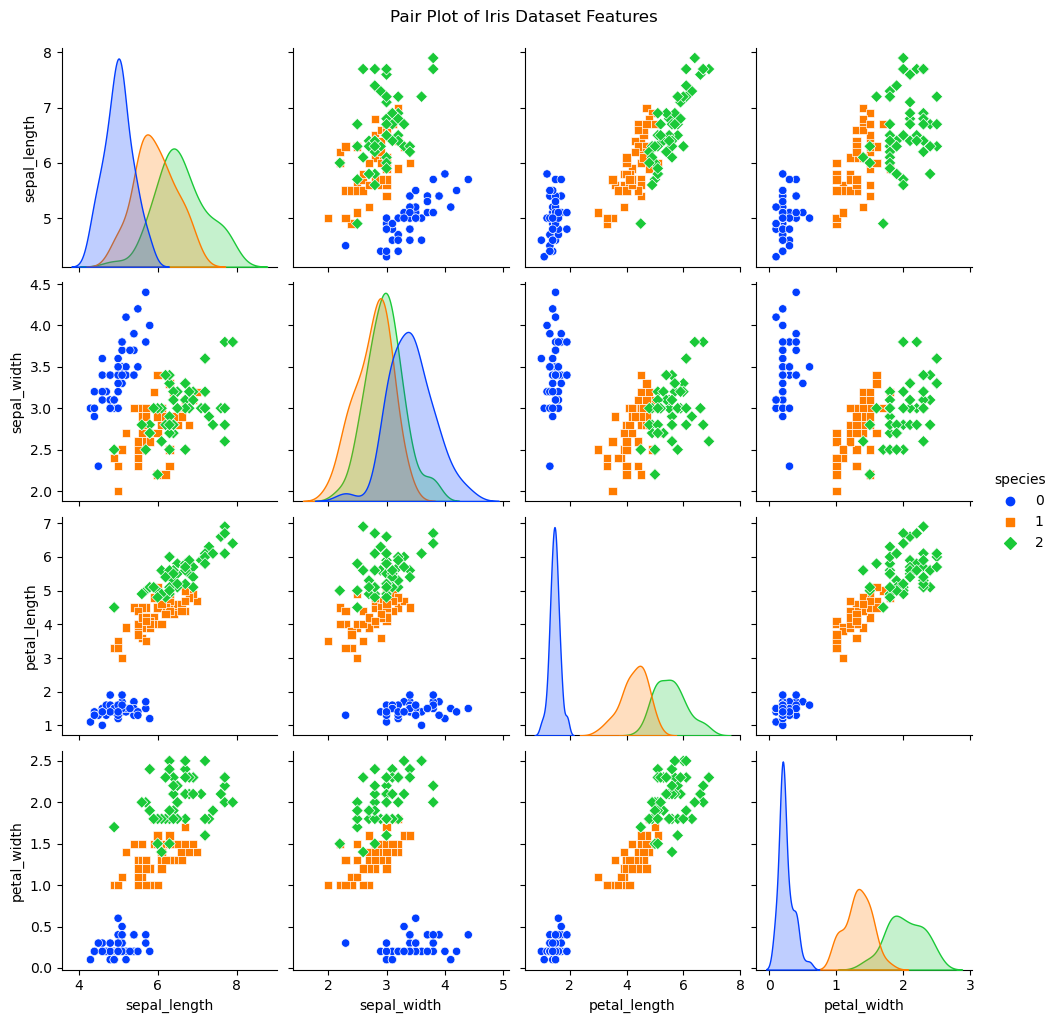

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add the species column back to X for visualization purposes
X['species'] = y

# Pair plot to show the relationships between features, colored by species
sns.pairplot(X, hue='species', palette='bright', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset Features", y=1.02)
plt.show()


## Splitting the data intpo test and train sets

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of training and testing sets
print("\nTraining features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (120, 5)
Testing features shape: (30, 5)
Training labels shape: (120,)
Testing labels shape: (30,)


## Machine learning implementation

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the K-Nearest Neighbors classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the species for the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print the results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


Model Accuracy: 1.00

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



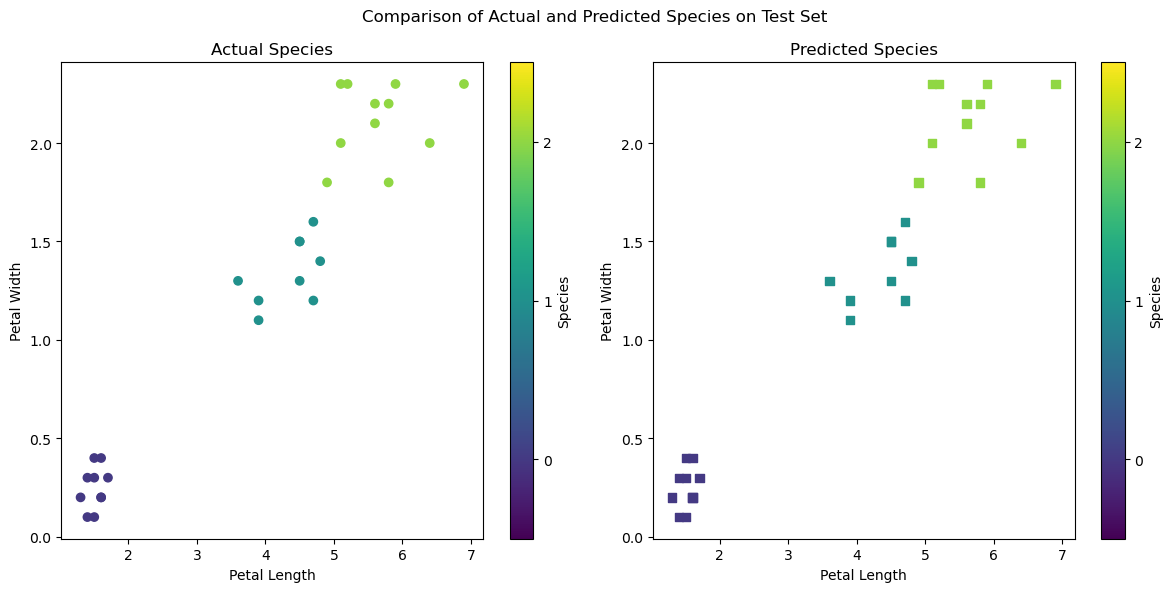

In [13]:
import matplotlib.pyplot as plt

# Map the species names back to the numeric predictions and true labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Plot the actual vs. predicted labels using petal length and width for visualization
plt.figure(figsize=(12, 6))

# Plot the actual labels
plt.subplot(1, 2, 1)
plt.scatter(X_test['petal_length'], X_test['petal_width'], c=y_test, cmap='viridis', marker='o', label='Actual')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Actual Species')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.clim(-0.5, 2.5)

# Plot the predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test['petal_length'], X_test['petal_width'], c=y_pred, cmap='viridis', marker='s', label='Predicted')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Predicted Species')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.clim(-0.5, 2.5)

plt.suptitle("Comparison of Actual and Predicted Species on Test Set")
plt.tight_layout()
plt.show()
